# PSO - *Particle Swarm Optimization*

Existem diversos tipos de algoritmos bioinspirados e um deles é o PSO, traduzindo para o português, Otimização por enxame de partículas.

Algoritmos bioinspirados são modelos computacionais baseados nas leis da natureza, ou seja, são implementações baseadas em princípios naturais para resolver problemas que a utilização da computação tradicional não seja capaz.

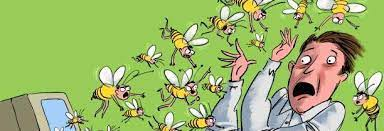

Este algoritmo foi inspirado no comportamento de um bando de pássaros. Estes pássaros correspondem a indivíduos que deveram trocar informações entre se, em um espaço de busca determinado, para encontrar a tragetória que cada um vai fazer, ou seja, de acordo com a função objetivo, cada indivíduo vai tomar caminhos para encontrar a solução ótima, onde está solução será a melhor posição do pássaro (indivíduo). A imagem a seguir representa este método:

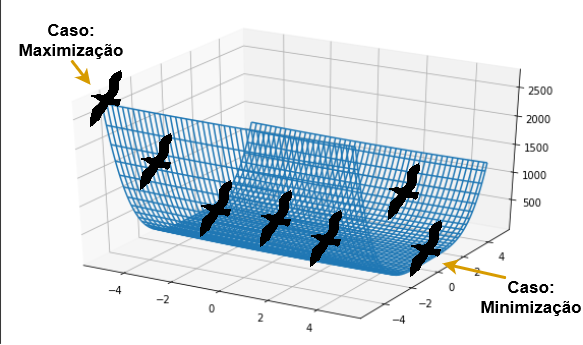

Obs.: A posição dos passaros (indivíduos) bem como as posições de máximo e mínimo são meramente ilustrativos !!!

Este método tem como principais vantagens, a fácil implementação e o seu baixo custo computacional. Mas por outro lado, pode ser que o PSO não consiga encontrar uma solução ótima, ou seja, chegando em uma solução local, sendo necessário um foco maior na implementação da topologia. As seguintes imagens ilustra dois tipos de topologia que podem ser utilizados. Um importe parâmetro para definir a topologia é o tamanho da população. O recomendado para este parâmetro é que seja 10 vezes maior que a quantidade de dimensões que tem a função objetivo.

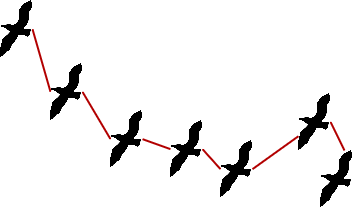

Está imagem representa a topologia local, onde cada indivíduo possui conexão com somente os seus vizinhos mais próximos. Devido a está condição, se a função objetivo tiver vários pontos de máximo/mínimo, são grandes as chances de se chegar em uma solução local. 

Sendo este recomendado para funções que possuem poucos pontos de máximo/mínimo.

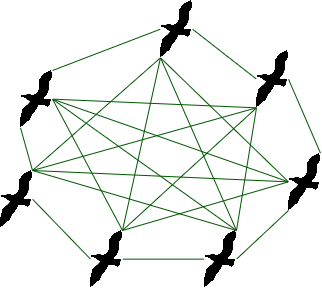

Já está imagem representa a topologia global, onde todos os indivíduos estão conectados. Sendo este recomendado para função objetivo que possui vários pontos de máximo/mínimo, devido a sua fácil convergência para soluções ótimas globais.

Basicamente, o algoritmo PSO define as trajetórias dos indivíduos, atualizando os parâmetros, *velocidade* $(V^{i}(t+1))$ e *posição* $(X^{i}(t+1))$, mostradas nas equações a seguir: 


$V^{i}(t+1)=wV^{i}(t)+c_{1}r_{1}(pbest^{i}-X^{i}(t))+c_{2}r_{2}(gbest-X^{i}(t))$

$X^{i}(t+1)=X^{i}(t)+V^{i}(t+1)$

onde, $r_{1}$ e $r_{2}$ são números aleatórios entre [0, 1], $c_{1}$ e $c_{2}$ são constantes de aceleração do melhor individual e global, $pbest$ representa a melhor posição do indivíduo, $gbest$ é a melhor posição dentre todos os indivíduos e $w$ representa o coeficiente de inércia. O critério de parada pode ser um valor pré-definido ou número de iterações.

# Exemplo a ser resolvido utilizando a biblioteca *Pyswarms*

A função *Six-Hump Camel* foi a escolhida para fazer a otimização:

$$ f(x)=(4-2.1x_{1}^{2}+\frac{x_{1}^{4}}{3})x_{1}^{2}+x_{1}x_{2}+(-4+4x_{2}^{2})x_{2}^{2} $$

O bloco de código a seguir tem como finalidade mostrar a plotagem da função escolhida.

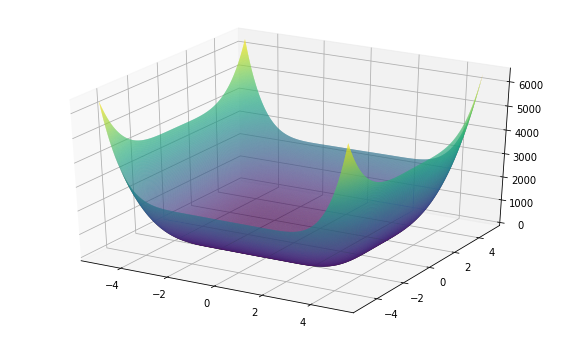

In [161]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np
 
# Criando a figura e projeção em 3D
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
 
# Função Six-Hump Camel
x = np.linspace(-5,5,700)
y = np.linspace(-5,5,700)

X, Y = np.meshgrid(x, y)

Z = (4 - (2.1*X**2) + ((X**4)/3))*X**2 + X*Y + (-4 + 4*Y**2)*Y**2
 
# Criando um Plot básico
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
 
# Exibindo o gráfico criado
plt.show()

In [ ]:
#Instalação da biblioteca pyswarms
!pip install pyswarms

In [ ]:
#Importe das bibliotecas
import numpy as np
import pyswarms as ps
from pyswarms.single.global_best import GlobalBestPSO

In [ ]:
#Função objetivo
def f(x):
  return (4 - (2.1*x[:, 0]**2) + ((x[:, 0]**4)/3))*x[:, 0]**2 + x[:, 0]*x[:, 1] + (-4 + 4*x[:, 1]**2)*x[:, 1]**2

In [ ]:
#Definição dos parâmetros
x_max = 10 * np.ones(2)
x_min = -1 * x_max
bounds = (x_min, x_max)
options = {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
optimizer = GlobalBestPSO(n_particles=10, dimensions=2, options=options, bounds=bounds)

cost, pos = optimizer.optimize(f, 1000)

In [159]:
#Resultados
print('Melhor solução para função objetivo: ', cost)
print('Melhor posição para função objetivo: ', pos)

Melhor solução para função objetivo:  -1.0316284534898774
Melhor posição para função objetivo:  [-0.08984201  0.7126564 ]


Fontes:

https://machinelearningmastery.com/a-gentle-introduction-to-particle-swarm-optimization/

http://computacaointeligente.com.br/algoritmos/otimizacao-por-enxame-de-particulas/

https://www.ecycle.com.br/algoritmos-bioinspirados/

https://pyswarms.readthedocs.io/en/latest/

https://www.sfu.ca/~ssurjano/camel6.html